In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from pysal.contrib.viz import mapping as maps
from shapely.geometry import Point, Polygon
import re
from IPython.display import IFrame
import mplleaflet
from geopandas import GeoDataFrame
import shapely.speedups
shapely.speedups.enable()
import glob
from shapely import wkt
from shapely.geometry.multipolygon import MultiPolygon
import pysal
%matplotlib inline

In [21]:
crs = {'init': 'epsg:4326'}

#import dataframes bomen 
df_boom = pd.concat([pd.read_csv(file, dtype=str, sep=';') for file in glob.glob('Data\BOMEN*')], axis=0, ignore_index=True)

# convert dataframes into geodataframes
df_boom.WKT_LNG_LAT = df_boom.WKT_LNG_LAT.str.replace(',', ' ')
geometry =df_boom['WKT_LNG_LAT'].apply(wkt.loads)
dfg_boom = GeoDataFrame(df_boom, crs=crs, geometry=geometry)

In [22]:
#import dataframes buurt
df_buurt = pd.read_csv("Data/GEBIED_BUURTEN_EXWATER.csv",  delimiter=';')

# convert dataframes into geodataframes
geometry = df_buurt['WKT_LNG_LAT'].apply(wkt.loads)
dfg_buurt = GeoDataFrame(df_buurt, crs=crs, geometry=geometry)

dfg_buurt.Stadsdeel_code.unique 

# dfg_buurt = dfg_buurt[dfg_buurt.Stadsdeel_code != 'A'] # Centrum
# dfg_buurt = dfg_buurt[dfg_buurt.Stadsdeel_code != 'N'] # Noord
# dfg_buurt = dfg_buurt[dfg_buurt.Stadsdeel_code != 'F'] # Nieuw-West
# dfg_buurt = dfg_buurt[dfg_buurt.Stadsdeel_code != 'B'] # West
# dfg_buurt = dfg_buurt[dfg_buurt.Stadsdeel_code != 'K'] # Zuid
# dfg_buurt = dfg_buurt[dfg_buurt.Stadsdeel_code != 'T'] # Zuid Oost
# dfg_buurt = dfg_buurt[dfg_buurt.Stadsdeel_code != 'M'] # Oost
# dfg_buurt = dfg_buurt[dfg_buurt.Stadsdeel_code != 'E'] # West

<bound method Series.unique of 0      T
1      T
2      T
3      T
4      T
5      T
6      T
7      T
8      T
9      T
10     T
11     T
12     T
13     T
14     T
15     T
16     T
17     T
18     T
19     T
20     T
21     T
22     K
23     K
24     K
25     K
26     K
27     K
28     K
29     K
      ..
446    N
447    N
448    N
449    A
450    A
451    A
452    K
453    E
454    A
455    A
456    E
457    F
458    A
459    K
460    M
461    N
462    N
463    F
464    K
465    M
466    N
467    N
468    N
469    N
470    K
471    N
472    N
473    M
474    M
475    N
Name: Stadsdeel_code, Length: 476, dtype: object>

In [23]:
#join the tree and buurt data frames
dfg_ggdfsjoin = gpd.sjoin(dfg_buurt,dfg_boom, how='left', op='contains') 

#Group by buurt
df_bb = dfg_ggdfsjoin.Buurt.value_counts().reset_index().rename(columns={'index': 'Buurt', 'Buurt': 'Boom_Count'})

df_bb

,Buurt,Boom_Count
0,Amstelpark,6784
1,Osdorper Binnenpolder,4270
2,G-buurt Oost,3872
3,Buitenveldert Zuidoost,3295
4,Nieuwe Oosterbegraafplaats,3201
5,Buitenveldert Zuidwest,3034
6,Vliegenbos,2818
7,Buitenveldert Midden Zuid,2803
8,Holendrecht Oost,2787
9,Vondelpark West,2244


,OBJECTNUMMER_left,Buurt_code,Buurt,Buurtcombinatie_code,Stadsdeel_code,Opp_m2,WKT_LNG_LAT_left,WKT_LAT_LNG_left,LNG_left,LAT_left,...,Soortnaam_NL,Boomnummer,Soortnaam_WTS,Boomtype,Boomhoogte,WKT_LNG_LAT_right,WKT_LAT_LNG_right,LNG_right,LAT_right,Unnamed: 10_right
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Gewone vleugelnoot,533799,Pterocarya fraxinifolia,Boom niet vrij uitgroeiend,12-15 m,POINT(4.948904 52.30735),"POINT(52.30735,4.948904)","4,948904","52,30735",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Gewone vleugelnoot,533800,Pterocarya fraxinifolia,Boom niet vrij uitgroeiend,12-15 m,POINT(4.948955 52.307365),"POINT(52.307365,4.948955)","4,948955","52,307365",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Gewone esdoorn (cultuurvariëteit),533813,Acer pseudoplatanus `Negenia`,Boom niet vrij uitgroeiend,6-9 m,POINT(4.947687 52.307371),"POINT(52.307371,4.947687)","4,947687","52,307371",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Gewone esdoorn (cultuurvariëteit),533819,Acer pseudoplatanus `Negenia`,Boom niet vrij uitgroeiend,9-12 m,POINT(4.947384 52.307382),"POINT(52.307382,4.947384)","4,947384","52,307382",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Goudes,533820,Fraxinus excelsior `Jaspidea`,Boom niet vrij uitgroeiend,6-9 m,POINT(4.947451 52.307423),"POINT(52.307423,4.947451)","4,947451","52,307423",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Els,534582,Alnus spaethii,Boom niet vrij uitgroeiend,15-18 m,POINT(4.94854 52.307461),"POINT(52.307461,4.94854)","4,94854","52,307461",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Goudes,533821,Fraxinus excelsior `Jaspidea`,Boom niet vrij uitgroeiend,6-9 m,POINT(4.947592 52.307471),"POINT(52.307471,4.947592)","4,947592","52,307471",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Els,533795,Alnus spaethii,Boom niet vrij uitgroeiend,15-18 m,POINT(4.948504 52.307489),"POINT(52.307489,4.948504)","4,948504","52,307489",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Zoete kers,595789,Prunus avium,Boom niet vrij uitgroeiend,6-9 m,POINT(4.949251 52.307494),"POINT(52.307494,4.949251)","4,949251","52,307494",NaN
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",...,Veldiep,595788,Ulmus minor,Boom niet vrij uitgroeiend,6-9 m,POINT(4.949355 52.307524),"POINT(52.307524,4.949355)","4,949355","52,307524",NaN


In [25]:

df_buurt.set_index(['Buurt'], inplace=True)
df_bb.set_index(['Buurt'], inplace=True)

df_bb2 = df_bb.join(df_buurt).reset_index()

In [26]:
#Calculate boom m2
df_bb3 = df_bb2[['Buurt', 'Boom_Count', 'Opp_m2','geometry']].copy()
df_bb3['Boom_m2'] = df_bb3['Boom_Count']/df_bb3['Opp_m2']

In [27]:
# #drop outliers, keep 90% of neighborhoods
# q5 = df_bb3.Boom_m2.quantile(0.20)
# q95 = df_bb3.Boom_m2.quantile(0.80)
# # print(q5)
# # print(q95)

# df_bb3 = df_bb3[df_bb3.Boom_m2 > q5]
# df_bb3 = df_bb3[df_bb3.Boom_m2 < q95]



In [28]:
#Calculate tree denisty index
Total_Tree = df_bb3['Boom_Count'].sum()
Total_Opp = df_bb3['Opp_m2'].sum()
boom_Opp_Adam = Total_Tree/Total_Opp
df_bb3['boomdichtheid_index'] = boom_Opp_Adam-df_bb3['Boom_m2']

#Convert to Geodataframe

dfg_bb = GeoDataFrame(df_bb3, crs=crs)

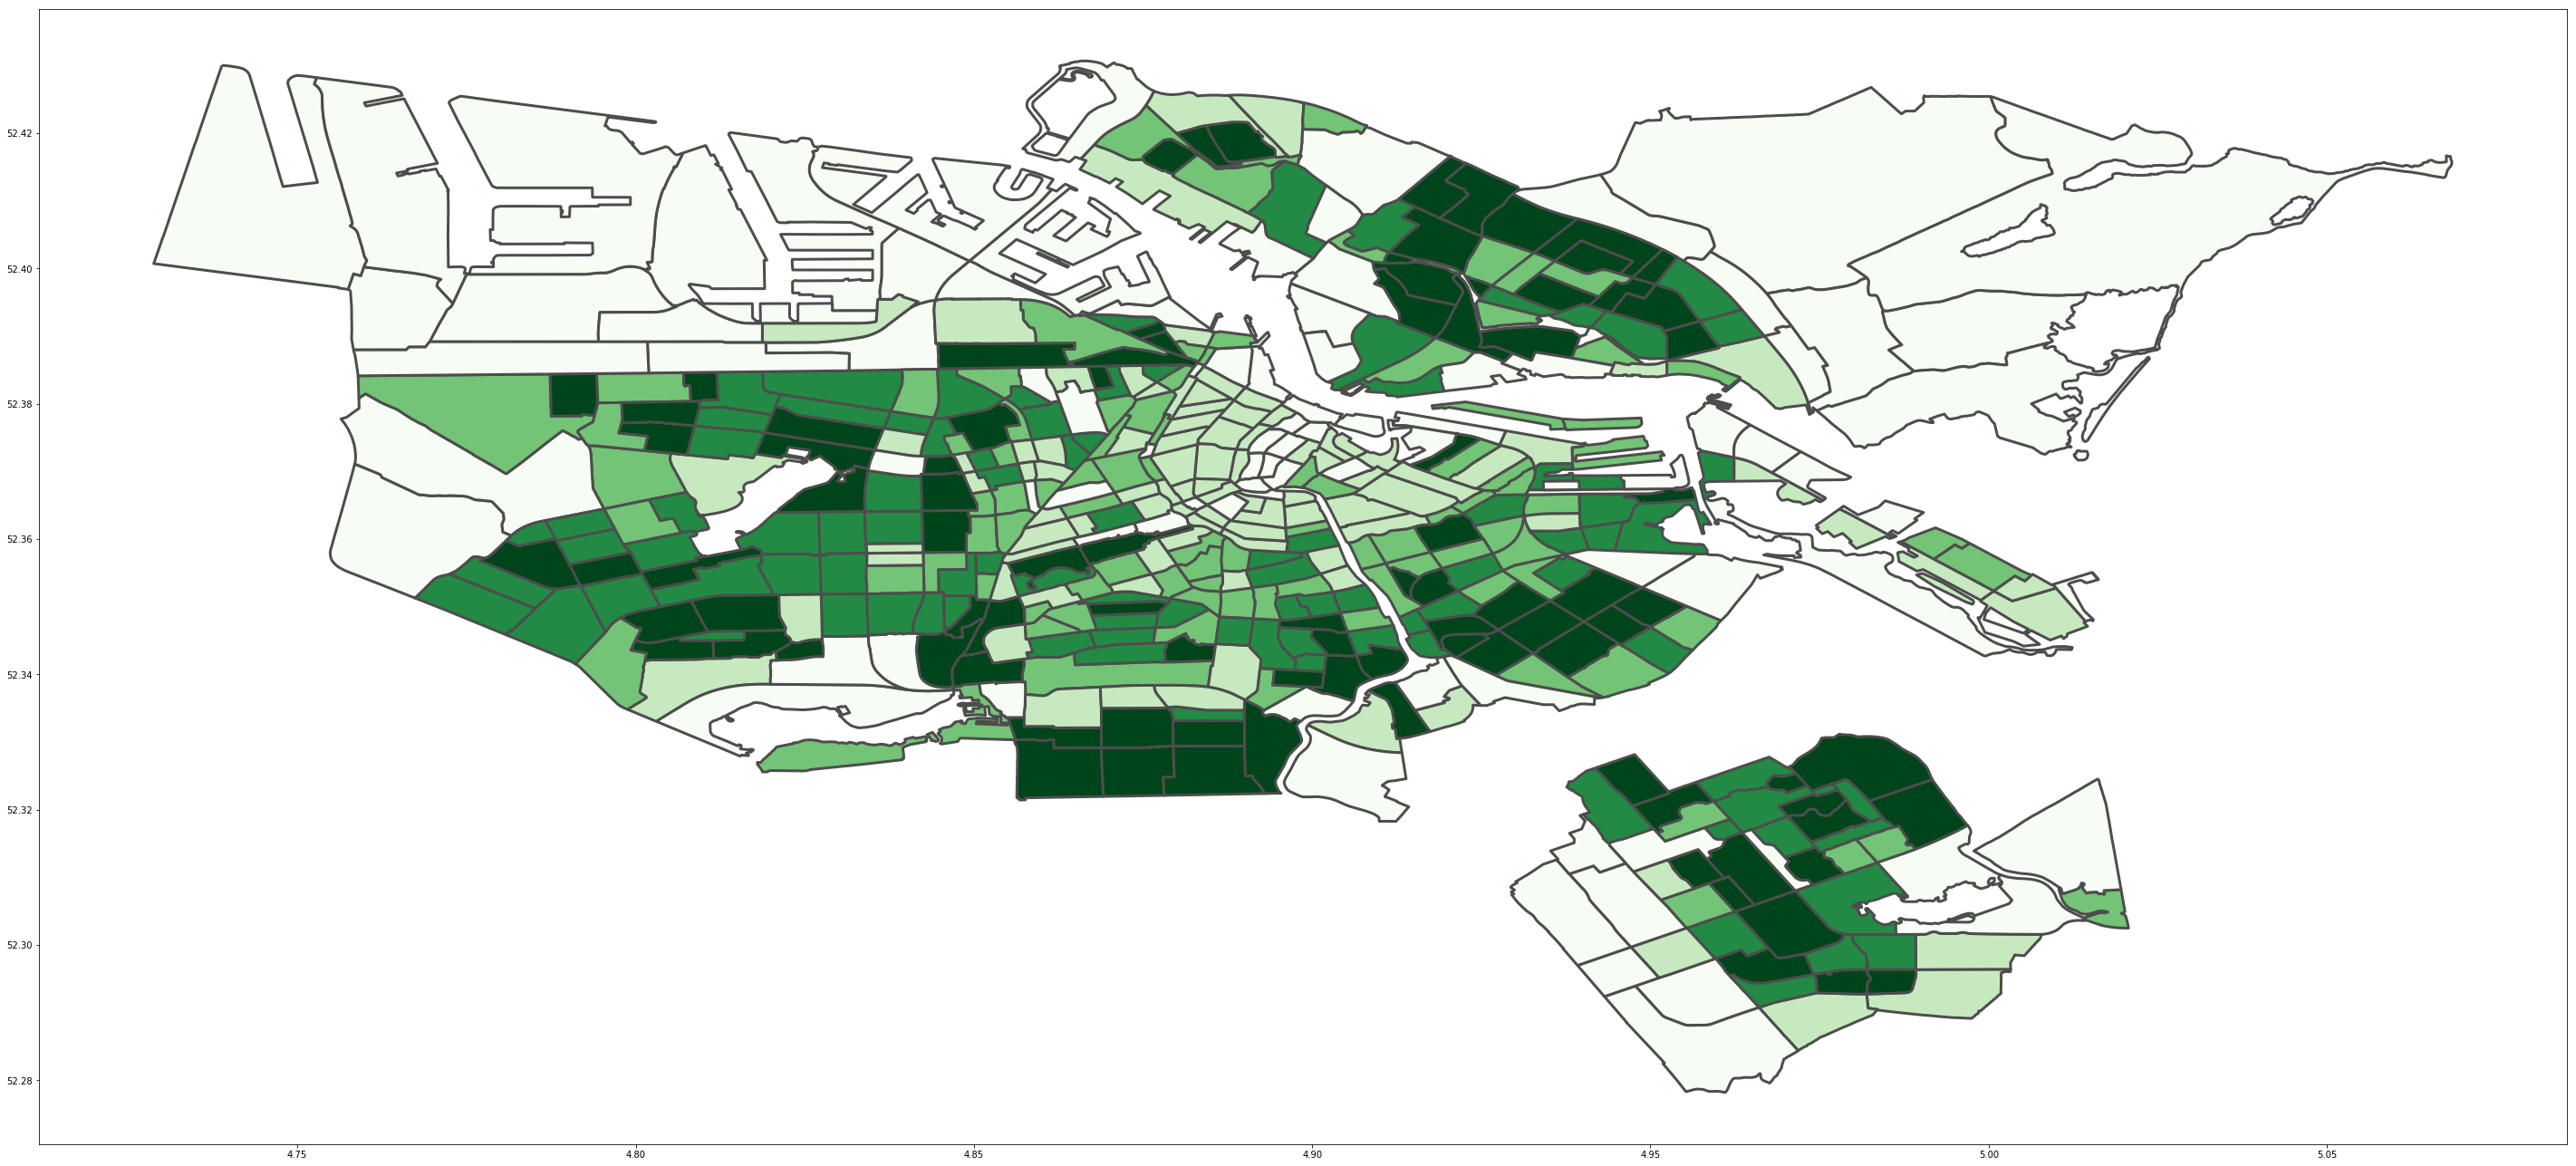

In [29]:
#plot


variable = df_bb3['Boom_m2']
vmin, vmax = 10, 20

fig, ax = plt.subplots(1, figsize=(50, 60))

dfg_bb.plot(column=variable, cmap='Greens', linewidth=3,  ax=ax, edgecolor='0.3',scheme='quantiles')